In [1]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns

In [2]:
# Reading the data
df = pd.read_csv('car_evaluation.csv', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'])

In [3]:
# Visualizing the dataframe
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# Checking the shape of the data
df.shape

(1728, 7)

In [5]:
#Checking for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# Null alues
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

We do not have any null values!

In [7]:
#description
df.describe().transpose()

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
target,1728,4,unacc,1210


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'target')

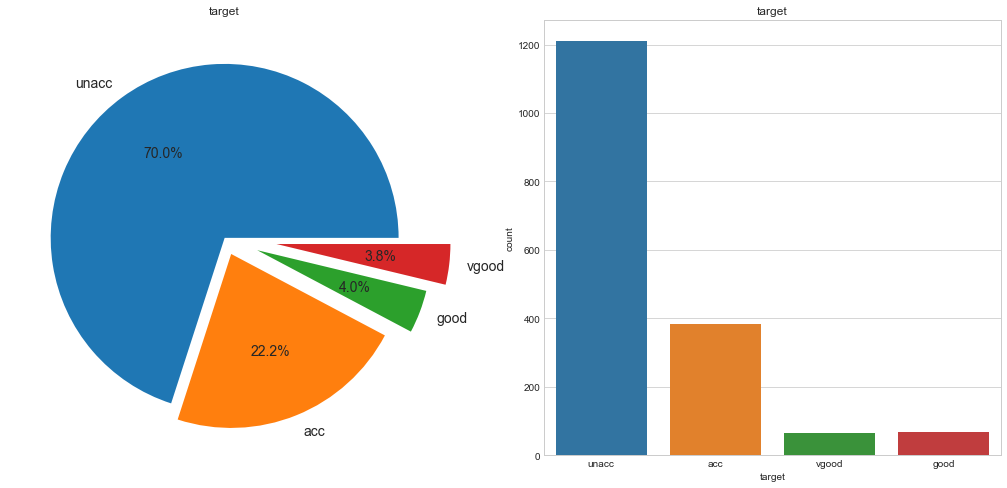

In [8]:
#Plotting target distribution
f,ax=plt.subplots(1,2,figsize=(18,8))
df['target'].value_counts().plot.pie(ax = ax[0], explode=[0,0.1, 0.2, 0.3],autopct='%1.1f%%',shadow=False, textprops={'fontsize': 14})
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=df,ax=ax[1])
ax[1].set_title('target')

# Pre-processing

In [9]:
#Checking the Columns or features
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'], dtype='object')

In [10]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']


In [11]:
# Find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']
print(numerical)

[]


In [12]:
# Printing all the unique classes in the features.
for col in categorical:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: target, dtype: int64


# EDA

In [13]:
# Creating pairwise list
cols = df.drop('target', axis = 1).columns
paircols = []
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        paircols.append([cols[i], cols[j]])

### Univariate Analysis

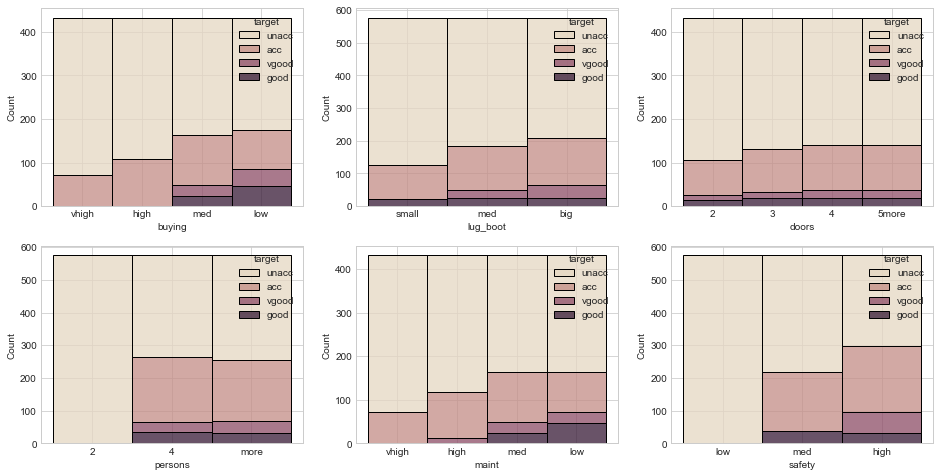

In [14]:
# Histplots for each feature
f,ax=plt.subplots(2,3,figsize=(16,8))
for i, col in enumerate(cols):
    sns.histplot(binwidth=0.5, x=col, hue="target", data=df, stat="count", multiple="stack", palette="ch:0.25", ax=ax[i%2, i%3])

### Multivariate analysis

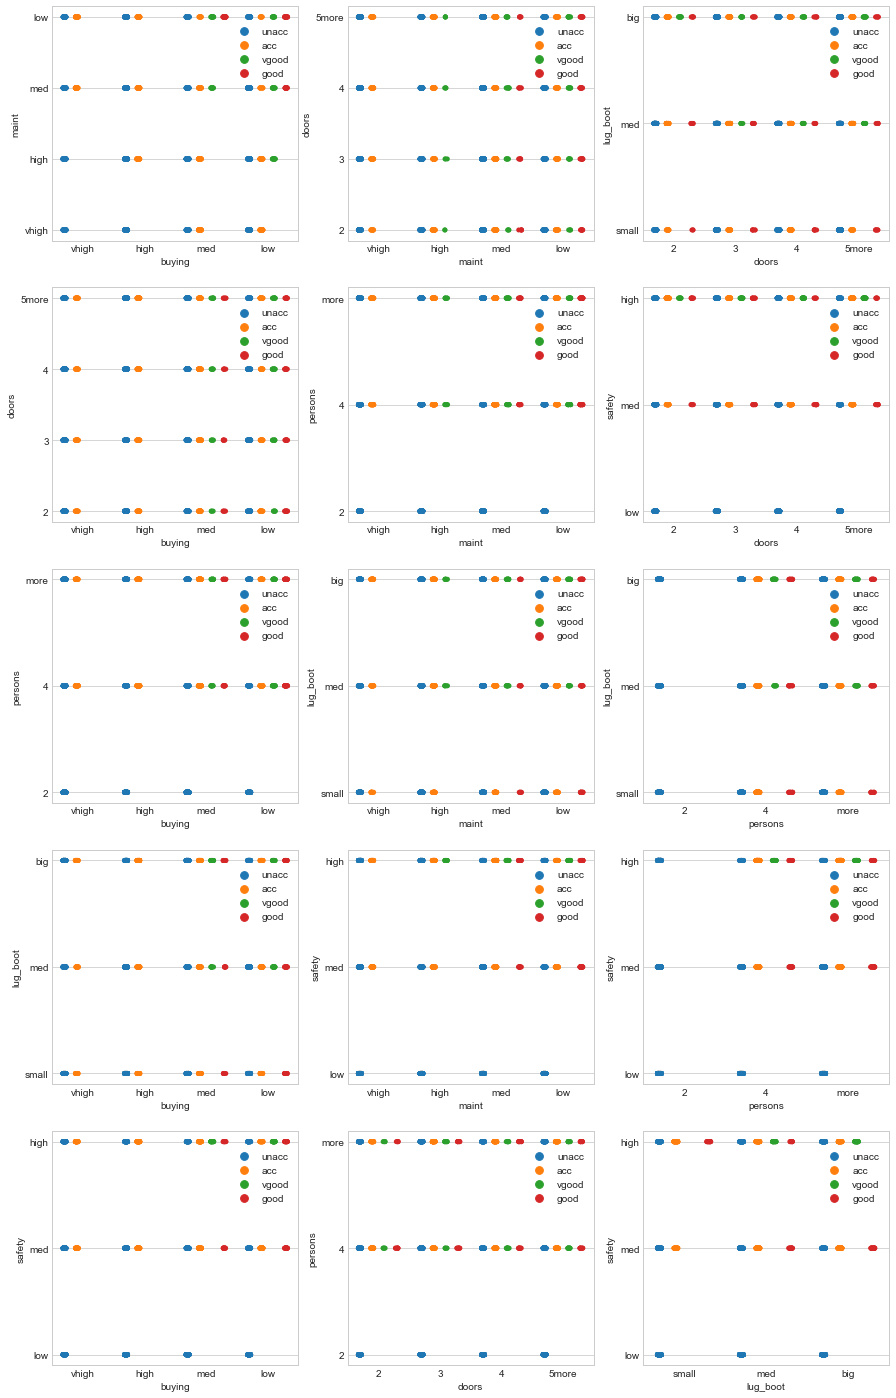

In [15]:
# Stripplot for each feature
f,ax=plt.subplots(5,3,figsize=(15,25))
j = -1
for i, col in enumerate(paircols):
    if i%5 == 0: j = j+1
    sns.stripplot(x =col[0], y =col[1], data = df,jitter = True, hue ='target', dodge = True, ax=ax[i%5, j],)
    ax[i%5, j].legend(bbox_to_anchor=(0.7, 0.95), loc=2)

# Modelling the Decision Tree models

As the dataset has categorical features and hence they needs to be encoded in the appropriate form. There are two main method of encodig:

1. One hot encoding
2. Label encoding

As we have categorial features that are ordinal in nature i.e that can be ranked (ordered) hence label encoding will solve our purpose.Had there been nominal features we could have preferred one hot encoding.

In [16]:
# Getting X and y
X = df.drop('target', axis = 1)
y = df['target']

In [17]:
# importing necessary package for encoding our categorial features
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=cols)
x= encoder.fit_transform(X)

In [18]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


In [19]:
# importing necessary packages
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import scikitplot.metrics as skplt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [20]:
# Splitting data into test train, using a 0.3 split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
# Exploring class distribution under train ,crossvalidation dataset
print('Training Dataset',X_train.shape,y_train.shape)
print('\n Class label distribution in Training Set\n',y_train.value_counts())
print('\n***********')
print("\n CrossValidation Dataset",X_test.shape,y_test.shape)
print('\nClass label distribution in Cross Validation Set\n',y_test.value_counts())
print('\n***********')

Training Dataset (1209, 6) (1209,)

 Class label distribution in Training Set
 unacc    852
acc      266
good      50
vgood     41
Name: target, dtype: int64

***********

 CrossValidation Dataset (519, 6) (519,)

Class label distribution in Cross Validation Set
 unacc    358
acc      118
vgood     24
good      19
Name: target, dtype: int64

***********


### Random Forest Classifier

In [22]:
# Importing and defining the random search feature space.
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(400,1400,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 15, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 2,3, 4, 5, 7,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, None], 'min_samples_split': [2, 3, 4, 5, 7, 10], 'min_samples_leaf': [1, 2, 4, 5], 'bootstrap': [True, False]}


In [23]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              10],
                                        'n_estimators': [400, 600, 800, 1000,
                                                         1200]},
                   random_state=42, verbose=2)

In [24]:
# Printing the best hyperparameters

rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

The best model is  RandomForestClassifier(bootstrap=False, n_estimators=400)

 The best model parameters are  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}

 The model accuracy on train set is 1.0

 The model accuracy on test set is 0.9653179190751445


 Classification Report
              precision    recall  f1-score   support

         acc       0.95      0.91      0.93       118
        good       0.74      0.89      0.81        19
       unacc       0.99      0.99      0.99       358
       vgood       0.88      0.88      0.88        24

    accuracy                           0.97       519
   macro avg       0.89      0.92      0.90       519
weighted avg       0.97      0.97      0.97       519



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

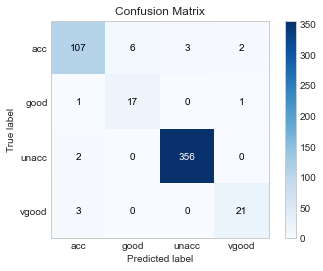

In [25]:
# Checking accuracies on the train and test data, predicting on the test data.

print('The best model is ', rf_random.best_estimator_)
print("\n The best model parameters are ",rf_random.best_params_)
print("\n The model accuracy on train set is",rf_random.score(X_train,y_train))
print("\n The model accuracy on test set is",rf_random.score(X_test,y_test))

y_predict=rf_random.predict(X_test)
accuracy=accuracy_score(y_test,y_predict,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test,y_predict))
skplt.plot_confusion_matrix(y_test,y_predict)

In [26]:
# Defining the model with the best parameters
clf = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=3, n_estimators = 1000)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=1000)


 The model accuracy on train set is 1.0

 The model accuracy on test set is 0.9633911368015414


 Classification Report
              precision    recall  f1-score   support

         acc       0.94      0.91      0.92       118
        good       0.77      0.89      0.83        19
       unacc       0.99      0.99      0.99       358
       vgood       0.84      0.88      0.86        24

    accuracy                           0.96       519
   macro avg       0.89      0.92      0.90       519
weighted avg       0.96      0.96      0.96       519



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

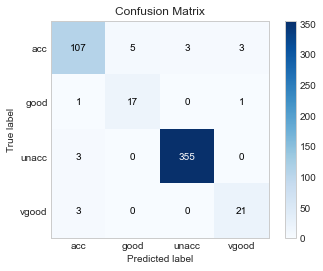

In [27]:
print("\n The model accuracy on train set is",clf.score(X_train,y_train))
print("\n The model accuracy on test set is",clf.score(X_test,y_test))

y_predict=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_predict,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test,y_predict))
skplt.plot_confusion_matrix(y_test,y_predict)

In [28]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.308498
persons     0.240509
maint       0.156148
buying      0.150323
lug_boot    0.085616
doors       0.058907
dtype: float64

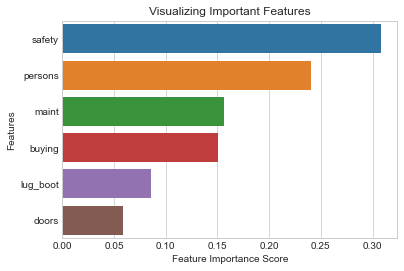

In [29]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

Building a model on selected features without the least important feature

In [30]:
# declare feature vector and target variable, without the least important feature

X1 = df.drop(['target', 'doors'], axis=1)

y1 = df['target']

In [31]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.33, random_state = 42)

In [32]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train1 = encoder.fit_transform(X_train1)

X_test1 = encoder.transform(X_test1)

In [33]:
# modelling without the least important feature
clf = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=3, n_estimators = 1000)
clf.fit(X_train1, y_train1)

RandomForestClassifier(min_samples_split=3, n_estimators=1000)


 The model accuracy on train set is 0.9688850475367329

 The model accuracy on test set is 0.9334500875656743


 Classification Report
              precision    recall  f1-score   support

         acc       0.89      0.84      0.86       129
        good       0.56      0.90      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.88      0.83       571
weighted avg       0.94      0.93      0.94       571



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

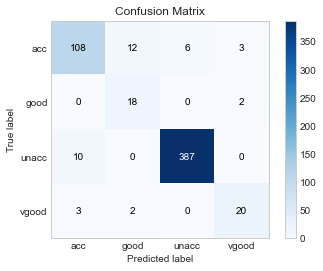

In [34]:
print("\n The model accuracy on train set is",clf.score(X_train1,y_train1))
print("\n The model accuracy on test set is",clf.score(X_test1,y_test1))

y_predict1=clf.predict(X_test1)
accuracy=accuracy_score(y_test1,y_predict1,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test1,y_predict1))
skplt.plot_confusion_matrix(y_test1,y_predict1)

### Xgboost

In [35]:
# import machine learning libraries
import xgboost as xgb

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [36]:
# Defining the feature space for search
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 42
    }

In [37]:
# Deifning the objective function to minimize as this is required by hyperopt library
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric = 'merror',
            early_stopping_rounds=10,verbose=2)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [38]:
# Getting the optimum
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                  

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.6897880539499036
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merr

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label e

[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                  

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                  

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                  

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                         

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                         

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
 45%|████████████████████▋              

[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.6897880539499036
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
 59%|███████████████████████████▏                  | 59/100 [00:09<00:07,  5.25trial/s, best loss: -0.6897880539499036]

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
 61%|████████████████████████████                  | 61/100 [00:09<00:10,  3.67trial/s, best loss: -0.6897880539499036]

SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                  

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
 64%|█████████████████████████████▍     

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
 64%|█████████████████████████████▍                | 64/100 [00:10<00:09,  3.69trial/s, best loss: -0.6897880539499036]

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                         

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                         

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
 83%|██████████████████████████████████████▏       | 83/100 [00:14<00:04,  3.94trial/s, best loss: -0.6897880539499036]

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                  

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
 86%|███████████████████████████████████

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
 88%|████████████████████████████████████████▍     | 88/100 [00:15<00:02,  4.12trial/s, best loss: -0.6897880539499036]

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[10]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                           
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
[0]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[2]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[4]	validation_0-merror:0.29529	validati

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[2]	validation_0-merror:0.29529	validation_1-merror:0.31021
[4]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[6]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[8]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
[9]	validation_0-merror:0.29529	validation_1-merror:0.31021                                                            
SCORE:                                                                                                                 
0.6897880539499036                                                                                                     
100%|█████████████████████████████████████████████| 100/100 [00:18<00:00,  5.55trial/s, best loss: -0.6897880539499036]


In [39]:
# Getting the best model
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5356402785750933, 'gamma': 8.930986603401166, 'max_depth': 9.0, 'min_child_weight': 1.0, 'reg_alpha': 119.0, 'reg_lambda': 0.09812781449273855}


In [40]:
# Best model
clf=xgb.XGBClassifier(best_hyperparams)
evaluation = [( X_train, y_train), ( X_test, y_test)]
clf.fit(X_train, y_train,
            eval_set=evaluation,
            early_stopping_rounds=10,verbose=2)

[08:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:0.94153	validation_1-mlogloss:0.94379
[2]	validation_0-mlogloss:0.53773	validation_1-mlogloss:0.55620
[4]	validation_0-mlogloss:0.34786	validation_1-mlogloss:0.37244
[6]	validation_0-mlogloss:0.23741	validation_1-mlogloss:0.26699
[8]	validation_0-mlogloss:0.17458	validation_1-mlogloss:0.21000
[10]	validation_0-mlogloss:0.13339	validation_1-mlogloss:0.17272
[12]	validation_0-mlogloss:0.10732	validation_1-mlogloss:0.14942
[14]	validation_0-mlogloss:0.08744	validation_1-mlogloss:0.12898


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\core.py:502: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16]	validation_0-mlogloss:0.07224	validation_1-mlogloss:0.11262
[18]	validation_0-mlogloss:0.06176	validation_1-mlogloss:0.10467
[20]	validation_0-mlogloss:0.05197	validation_1-mlogloss:0.09462
[22]	validation_0-mlogloss:0.04259	validation_1-mlogloss:0.08466
[24]	validation_0-mlogloss:0.03656	validation_1-mlogloss:0.08024
[26]	validation_0-mlogloss:0.03204	validation_1-mlogloss:0.07596
[28]	validation_0-mlogloss:0.02850	validation_1-mlogloss:0.07431
[30]	validation_0-mlogloss:0.02557	validation_1-mlogloss:0.07131
[32]	validation_0-mlogloss:0.02324	validation_1-mlogloss:0.07019
[34]	validation_0-mlogloss:0.02097	validation_1-mlogloss:0.06757
[36]	validation_0-mlogloss:0.01961	validation_1-mlogloss:0.06629
[38]	validation_0-mlogloss:0.01840	validation_1-mlogloss:0.06548
[40]	validation_0-mlogloss:0.01672	validation_1-mlogloss:0.06358
[42]	validation_0-mlogloss:0.01589	validation_1-mlogloss:0.06396
[44]	validation_0-mlogloss:0.01541	validation_1-mlogloss:0.06414
[46]	validation_0-mloglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


 The model accuracy on train set is 1.0

 The model accuracy on test set is 0.9807321772639692


 Classification Report
              precision    recall  f1-score   support

         acc       0.97      0.95      0.96       118
        good       0.77      0.89      0.83        19
       unacc       1.00      1.00      1.00       358
       vgood       0.92      0.96      0.94        24

    accuracy                           0.98       519
   macro avg       0.92      0.95      0.93       519
weighted avg       0.98      0.98      0.98       519



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

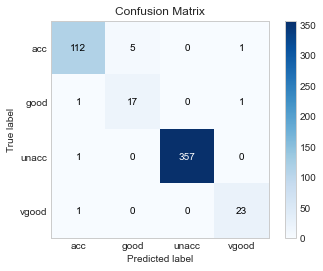

In [41]:
print("\n The model accuracy on train set is",clf.score(X_train,y_train))
print("\n The model accuracy on test set is",clf.score(X_test,y_test))

y_predict=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_predict,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test,y_predict))
skplt.plot_confusion_matrix(y_test,y_predict)

## Updates

In [42]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
df = encoder.fit_transform(df)

In [43]:
from sklearn.preprocessing import PolynomialFeatures

# summarize the shape of the dataset
print(df.shape)
# summarize each variable
display(df.head(2))

# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=4)
data = trans.fit_transform(df.iloc[:,:-1])

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# summarize
display(dataset.head(2))

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,target
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc


,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,4.0,1.0,2.0,4.0,8.0,1.0,2.0,4.0,8.0,16.0


In [44]:
# Getting X and y
X = dataset
y = df['target']

In [45]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,4.0,1.0,2.0,4.0,8.0,1.0,2.0,4.0,8.0,16.0
2,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,...,9.0,1.0,3.0,9.0,27.0,1.0,3.0,9.0,27.0,81.0
3,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,8.0,4.0,2.0,1.0,16.0,8.0,4.0,2.0,1.0
4,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,4.0,8.0,8.0,8.0,8.0,16.0,16.0,16.0,16.0,16.0


In [46]:
# importing necessary packages
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import scikitplot.metrics as skplt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [47]:
# Splitting data into test train, using a 0.3 split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Exploring class distribution under train ,crossvalidation dataset
print('Training Dataset',X_train.shape,y_train.shape)
print('\n Class label distribution in Training Set\n',y_train.value_counts())
print('\n***********')
print("\n CrossValidation Dataset",X_test.shape,y_test.shape)
print('\nClass label distribution in Cross Validation Set\n',y_test.value_counts())
print('\n***********')

Training Dataset (1209, 210) (1209,)

 Class label distribution in Training Set
 unacc    852
acc      266
good      50
vgood     41
Name: target, dtype: int64

***********

 CrossValidation Dataset (519, 210) (519,)

Class label distribution in Cross Validation Set
 unacc    358
acc      118
vgood     24
good      19
Name: target, dtype: int64

***********


In [49]:
# Importing and defining the random search feature space.
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(400,1400,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 15, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 2,3, 4, 5, 7,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, None], 'min_samples_split': [2, 3, 4, 5, 7, 10], 'min_samples_leaf': [1, 2, 4, 5], 'bootstrap': [True, False]}


In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              10],
                                        'n_estimators': [400, 600, 800, 1000,
                                                         1200]},
                   random_state=42, verbose=2)

In [51]:
# Printing the best hyperparameters

rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

The best model is  RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=1000)

 The best model parameters are  {'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

 The model accuracy on train set is 1.0

 The model accuracy on test set is 0.9845857418111753


 Classification Report
              precision    recall  f1-score   support

         acc       0.97      0.97      0.97       118
        good       0.90      1.00      0.95        19
       unacc       1.00      0.99      1.00       358
       vgood       0.92      0.92      0.92        24

    accuracy                           0.98       519
   macro avg       0.95      0.97      0.96       519
weighted avg       0.98      0.98      0.98       519



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

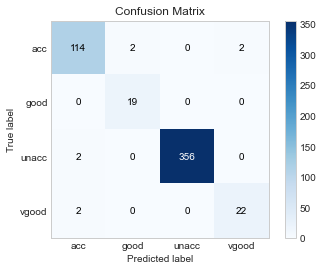

In [52]:
# Checking accuracies on the train and test data, predicting on the test data.

print('The best model is ', rf_random.best_estimator_)
print("\n The best model parameters are ",rf_random.best_params_)
print("\n The model accuracy on train set is",rf_random.score(X_train,y_train))
print("\n The model accuracy on test set is",rf_random.score(X_test,y_test))

y_predict=rf_random.predict(X_test)
accuracy=accuracy_score(y_test,y_predict,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test,y_predict))
skplt.plot_confusion_matrix(y_test,y_predict)

In [53]:
# Defining the model with the best parameters
clf = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=3, n_estimators = 1000)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=1000)


 The model accuracy on train set is 1.0

 The model accuracy on test set is 0.9845857418111753


 Classification Report
              precision    recall  f1-score   support

         acc       0.97      0.97      0.97       118
        good       0.90      1.00      0.95        19
       unacc       1.00      0.99      1.00       358
       vgood       0.96      0.92      0.94        24

    accuracy                           0.98       519
   macro avg       0.96      0.97      0.96       519
weighted avg       0.98      0.98      0.98       519



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

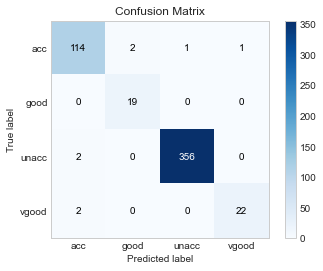

In [54]:
print("\n The model accuracy on train set is",clf.score(X_train,y_train))
print("\n The model accuracy on test set is",clf.score(X_test,y_test))

y_predict=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_predict,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test,y_predict))
skplt.plot_confusion_matrix(y_test,y_predict)

In [55]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

24     0.035130
200    0.032737
119    0.027746
203    0.024956
135    0.020424
         ...   
3      0.000210
175    0.000153
64     0.000112
18     0.000102
0      0.000000
Length: 210, dtype: float64

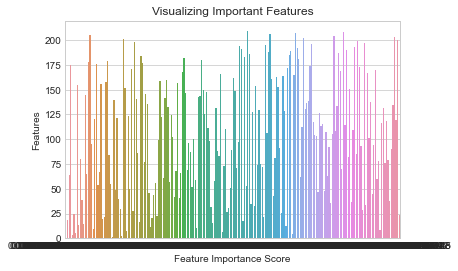

In [56]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [57]:
list(feature_scores[feature_scores < 0.01].index)

[109,
 37,
 151,
 82,
 190,
 114,
 208,
 70,
 169,
 187,
 134,
 108,
 204,
 105,
 36,
 92,
 63,
 107,
 48,
 115,
 113,
 126,
 47,
 103,
 104,
 117,
 196,
 174,
 139,
 137,
 130,
 202,
 112,
 62,
 181,
 192,
 207,
 165,
 4,
 189,
 185,
 172,
 12,
 128,
 164,
 26,
 91,
 153,
 163,
 81,
 43,
 161,
 206,
 188,
 106,
 195,
 22,
 72,
 75,
 129,
 74,
 154,
 33,
 127,
 35,
 186,
 209,
 53,
 183,
 17,
 191,
 194,
 97,
 71,
 149,
 162,
 89,
 51,
 31,
 27,
 110,
 73,
 6,
 166,
 83,
 88,
 131,
 58,
 15,
 32,
 98,
 111,
 148,
 125,
 150,
 180,
 144,
 143,
 10,
 59,
 100,
 52,
 87,
 96,
 69,
 147,
 182,
 168,
 66,
 41,
 157,
 68,
 42,
 102,
 124,
 57,
 133,
 160,
 142,
 61,
 122,
 159,
 99,
 23,
 56,
 44,
 20,
 11,
 46,
 136,
 146,
 77,
 177,
 184,
 16,
 86,
 141,
 198,
 28,
 171,
 50,
 123,
 7,
 152,
 201,
 2,
 30,
 40,
 121,
 49,
 140,
 1,
 55,
 84,
 179,
 158,
 21,
 19,
 156,
 67,
 54,
 176,
 120,
 9,
 95,
 205,
 178,
 65,
 145,
 14,
 39,
 80,
 13,
 155,
 5,
 25,
 3,
 175,
 64,
 18,
 0]

Building a model on selected features without the least important feature

In [58]:
# declare feature vector and target variable, without the least important feature

X1 = X.drop(list(feature_scores[feature_scores < 0.01].index), axis=1)

y1 = df['target']

In [59]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.33, random_state = 42)

In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train1, y_train1)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              10],
                                        'n_estimators': [400, 600, 800, 1000,
                                                         1200]},
                   random_state=42, verbose=2)

In [61]:
# Printing the best hyperparameters

rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

The best model is  RandomForestClassifier(min_samples_split=7, n_estimators=600)

 The best model parameters are  {'n_estimators': 600, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}

 The model accuracy on train set is 0.9904926534140017

 The model accuracy on test set is 0.9597197898423818


 Classification Report
              precision    recall  f1-score   support

         acc       0.91      0.91      0.91       129
        good       0.70      0.95      0.81        20
       unacc       1.00      0.98      0.99       397
       vgood       0.85      0.92      0.88        25

    accuracy                           0.96       571
   macro avg       0.87      0.94      0.90       571
weighted avg       0.96      0.96      0.96       571



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

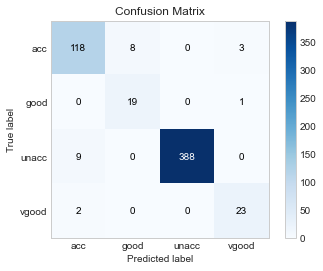

In [62]:
# Checking accuracies on the train and test data, predicting on the test data.

print('The best model is ', rf_random.best_estimator_)
print("\n The best model parameters are ",rf_random.best_params_)
print("\n The model accuracy on train set is",rf_random.score(X_train1,y_train1))
print("\n The model accuracy on test set is",rf_random.score(X_test1,y_test1))

y_predict=rf_random.predict(X_test1)
accuracy=accuracy_score(y_test1,y_predict,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test1,y_predict))
skplt.plot_confusion_matrix(y_test1,y_predict)

## Using SMOTE for Upsampling

In [63]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
1178,1.0,3.0,3.0,4.0,2.0,3.0,3.0,9.0,9.0,12.0,...,36.0,54.0,54.0,54.0,54.0,81.0,81.0,81.0,81.0,81.0
585,1.0,2.0,2.0,2.0,3.0,1.0,1.0,4.0,4.0,4.0,...,9.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0
1552,1.0,4.0,3.0,2.0,2.0,2.0,2.0,16.0,12.0,8.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
1169,1.0,3.0,3.0,4.0,1.0,3.0,3.0,9.0,9.0,12.0,...,9.0,27.0,27.0,27.0,27.0,81.0,81.0,81.0,81.0,81.0
1033,1.0,3.0,2.0,3.0,1.0,3.0,2.0,9.0,6.0,9.0,...,4.0,27.0,18.0,12.0,8.0,81.0,54.0,36.0,24.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.0,3.0,3.0,2.0,3.0,2.0,3.0,9.0,9.0,6.0,...,81.0,24.0,36.0,54.0,81.0,16.0,24.0,36.0,54.0,81.0
1294,1.0,3.0,4.0,4.0,3.0,3.0,2.0,9.0,12.0,12.0,...,36.0,81.0,54.0,36.0,24.0,81.0,54.0,36.0,24.0,16.0
860,1.0,2.0,4.0,4.0,3.0,2.0,3.0,4.0,8.0,8.0,...,81.0,24.0,36.0,54.0,81.0,16.0,24.0,36.0,54.0,81.0
1459,1.0,4.0,2.0,3.0,1.0,1.0,2.0,16.0,8.0,12.0,...,4.0,1.0,2.0,4.0,8.0,1.0,2.0,4.0,8.0,16.0


In [64]:
y_train

1178    vgood
585     unacc
1552      acc
1169    unacc
1033    unacc
        ...  
1130    vgood
1294     good
860       acc
1459    unacc
1126      acc
Name: target, Length: 1209, dtype: object

Class=3, n=852 (25.000%)
Class=2, n=852 (25.000%)
Class=0, n=852 (25.000%)
Class=1, n=852 (25.000%)


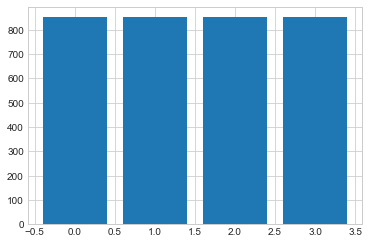

In [65]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y_train)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [66]:
X_train = X
y_train = y

In [68]:
y_test = LabelEncoder().fit_transform(y_test)

In [69]:
# Importing and defining the random search feature space.
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(400,1400,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 15, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 2,3, 4, 5, 7,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, None], 'min_samples_split': [2, 3, 4, 5, 7, 10], 'min_samples_leaf': [1, 2, 4, 5], 'bootstrap': [True, False]}


In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              10],
                                        'n_estimators': [400, 600, 800, 1000,
                                                         1200]},
                   random_state=42, verbose=2)

In [71]:
# Printing the best hyperparameters

rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

The best model is  RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=600)

 The best model parameters are  {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}

 The model accuracy on train set is 1.0

 The model accuracy on test set is 0.9865125240847784


 Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.86      1.00      0.93        19
           2       1.00      0.99      1.00       358
           3       0.96      1.00      0.98        24

    accuracy                           0.99       519
   macro avg       0.95      0.99      0.97       519
weighted avg       0.99      0.99      0.99       519



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

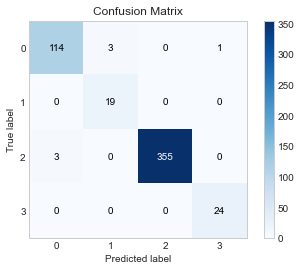

In [72]:
# Checking accuracies on the train and test data, predicting on the test data.

print('The best model is ', rf_random.best_estimator_)
print("\n The best model parameters are ",rf_random.best_params_)
print("\n The model accuracy on train set is",rf_random.score(X_train,y_train))
print("\n The model accuracy on test set is",rf_random.score(X_test,y_test))

y_predict=rf_random.predict(X_test)
accuracy=accuracy_score(y_test,y_predict,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test,y_predict))
skplt.plot_confusion_matrix(y_test,y_predict)